# Objectives
1. Hypothesis tests 
    - Hypothesis tests and z-score
    - P-value 
    - Statistical significance
2. Two-Sample and ANOVA Tests
    - t-tests
    - Calculating p_value from t-test
    - paried t-tests
    - ANOVA tests
3. Proportion test
    - One-sample proportion tests
    - Two sample proportion tests
    - Chi-square test of independence
    - Chi-square goodness of fit tests
4. Non-parametric tests
    - Parametric tests: assumptions, consequences and solutions
    - Non parametric tests: 
     - Wilcoxon-signed rank test: paired t-test
     - Wilcoxon-Mann_Whitney test (Mann Whitney U test): unpaired t-tests
     - Kruskal-Wallis test: ANOVA test

## 1. Introduction to Hypothesis Testing
- A/B test 
- If the results from the A/B test statistically significant or just chance?
- z-score

### 1.1 Hypothesis tests and z-scores
- A hypothese
- Use sampling method to observe the mean and std of sampling: here we use bootstrap sampling 
- Use z-score to standarize the dataset 
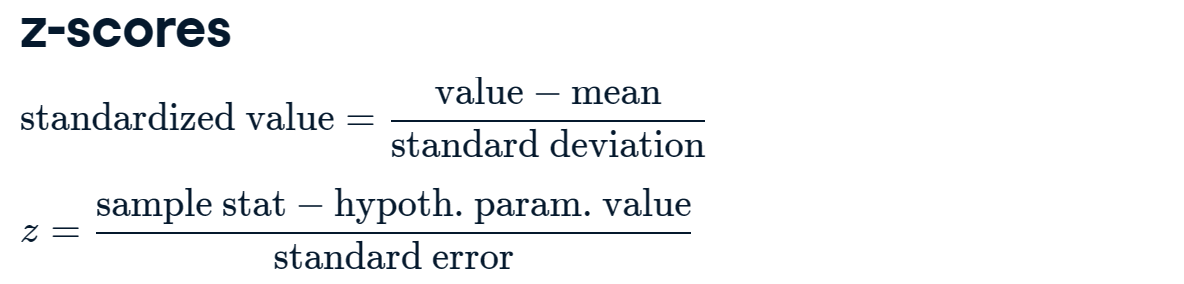
- Determine z-score is high or lower? 
> **Hypothesis testing use case:**
Determine whether sample statistics are close to or far away from expected (or 'hypothesized' values)
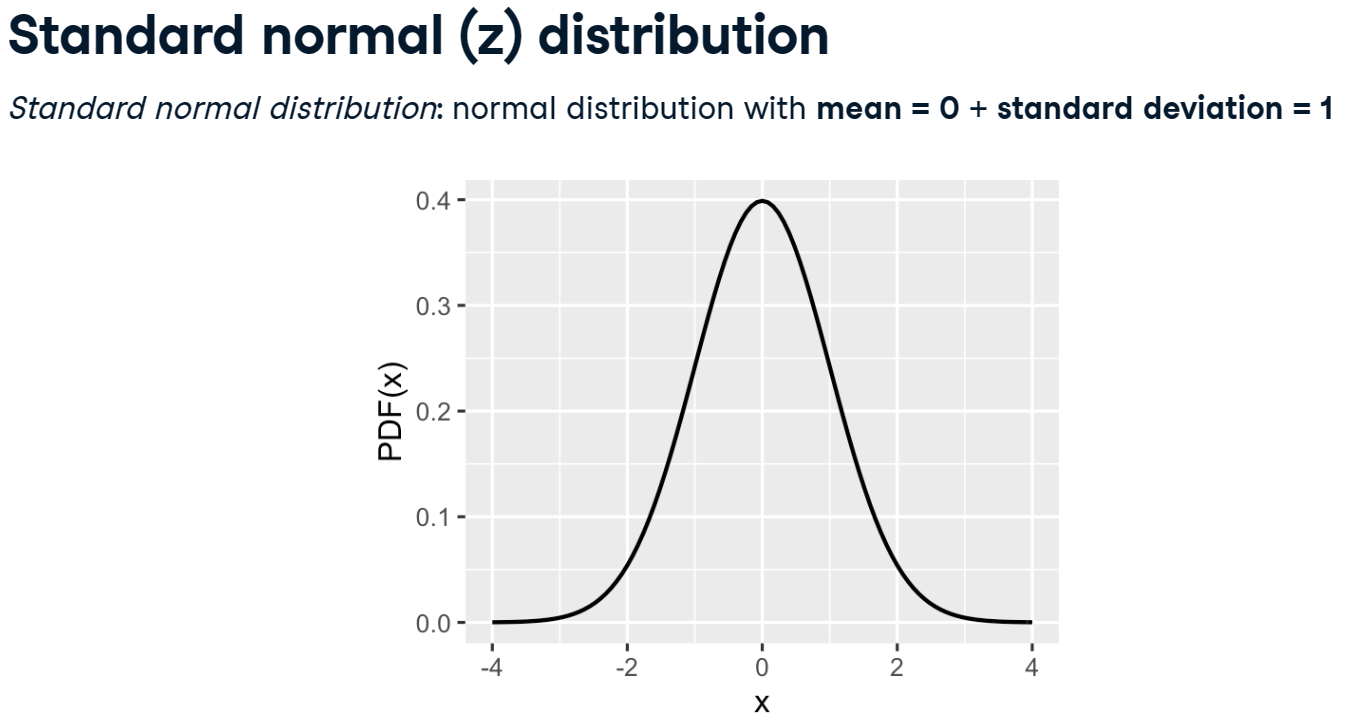

In [3]:
pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73049 sha256=34e14fbada697ab4b61c93d8592f50f1d8d14737c89487b50205a44da5f593a7
  Stored in directory: c:\users\qxj\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_file('stackoverflow/stack-overflow-2018-developer-survey', file_name='survey_results_public.csv',  path='/QXJ/kaggle/data')

True

In [256]:
stack_overflow = pd.read_csv('/QXJ/kaggle/data/survey_results_public.csv')
stack_overflow.head()

C:\Users\QXJ\AppData\Local\Temp\ipykernel_2044\777821176.py:1: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  stack_overflow = pd.read_csv('/QXJ/kaggle/data/survey_results_public.csv')


Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology, chemistry, phy...   
2  Computer science, computer engineering, or sof...   
3  Computer science, computer engineering, or sof...   
4  Computer science, computer engineering, or sof...   

                CompanySize  \
0        20 to 99 employees   
1  10,000 or more employees   
2        20 to 99 employees   
3      100 to 499 employees   
4  10,000 or more employees   

                                             DevType  ...  \
0                               Full-stack developer  ...   
1  Database administrator;DevOps specialist;Full-...  ...   
2           Engineering manager;Full-stack developer  ...   
3                               Full-stack developer  ...   
4  Data or business analyst;Desktop or enterprise...  ...   

                     Exercise Gender         SexualOrientation  \
0        3 - 4 times per week   Male  Straight or heterosexual   
1   Daily or almost every day   Male  Straight or heterosexual   
2                         NaN    NaN                       NaN   
3  I don't typically exercise   Male  Straight or heterosexual   
4        3 - 4 times per week   Male  Straight or heterosexual   

                                    EducationParents  \
0           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2                                                NaN   
3  Some college/university study without earning ...   
4  Some college/university study without earning ...   

                  RaceEthnicity                Age Dependents  MilitaryUS  \
0   Black or of African descent  25 - 34 years old        Yes         NaN   
1  White or of European descent  35 - 44 years old        Yes         NaN   
2                           NaN                NaN        NaN         NaN   
3  White or of European descent  35 - 44 years old         No          No   
4  White or of European descent  18 - 24 years old        Yes         NaN   

                          SurveyTooLong     SurveyEasy  
0  The survey was an appropriate length      Very easy  
1  The survey was an appropriate length  Somewhat easy  
2                                   NaN            NaN  
3  The survey was an appropriate length  Somewhat easy  
4  The survey was an appropriate length  Somewhat easy  

[5 rows x 129 columns]

**Clean the data**

In [257]:
stack_overflow.columns.tolist()

['Respondent',
 'Hobby',
 'OpenSource',
 'Country',
 'Student',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'CompanySize',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'LastNewJob',
 'AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10',
 'AssessBenefits1',
 'AssessBenefits2',
 'AssessBenefits3',
 'AssessBenefits4',
 'AssessBenefits5',
 'AssessBenefits6',
 'AssessBenefits7',
 'AssessBenefits8',
 'AssessBenefits9',
 'AssessBenefits10',
 'AssessBenefits11',
 'JobContactPriorities1',
 'JobContactPriorities2',
 'JobContactPriorities3',
 'JobContactPriorities4',
 'JobContactPriorities5',
 'JobEmailPriorities1',
 'JobEmailPriorities2',
 'JobEmailPriorities3',
 'JobEmailPriorities4',
 'JobEmailPriorities5',
 'JobEmailPriorities6',
 'JobEmailPriorities7',
 'UpdateCV',
 'Currency',
 'Salary',
 'SalaryType',

In [258]:
stack_overflow_compact = stack_overflow[['Respondent',
 'Hobby',
 'Country','Gender','Age',
 'FormalEducation',
 'UndergradMajor','DevType',
 'YearsCoding',
 'YearsCodingProf','EducationTypes','ConvertedSalary']].reset_index(drop = True)
stack_overflow_compact.head()
stack_overflow_compact.to_csv('/QXJ/kaggle/data/stack_coverflow_compact.csv')

In [259]:
stack_overflow_compact.dropna(subset = 'ConvertedSalary', axis = 0, inplace = True)

In [260]:
stack_overflow_compact.dropna(subset= ['EducationTypes','YearsCodingProf','UndergradMajor','DevType'], axis = 0, inplace = True)

In [261]:
stack_overflow_compact.isna().sum()

Respondent            0
Hobby                 0
Country               0
Gender             2181
Age                1922
FormalEducation       0
UndergradMajor        0
DevType               0
YearsCoding           7
YearsCodingProf       0
EducationTypes        0
ConvertedSalary       0
dtype: int64

In [264]:
stack_overflow_compact['Age'].unique()

array(['35 - 44 years old', '18 - 24 years old', '25 - 34 years old',
       'Unknown', '45 - 54 years old', '55 - 64 years old',
       'Under 18 years old', '65 years or older'], dtype=object)

In [265]:
stack_overflow_compact['Age'].fillna('Unknown', inplace = True)

In [266]:
stack_overflow_compact.dropna(subset = 'YearsCoding', axis = 0, inplace = True)

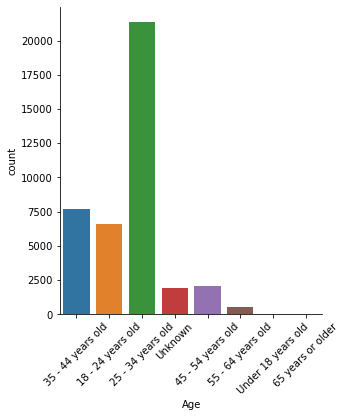

In [267]:
ax = sns.catplot(data = stack_overflow_compact, x = 'Age', kind = 'count')
ax.set_xticklabels(rotation = 45)
plt.show()

In [268]:
stack_overflow_compact['Gender'].unique()

array(['Male', 'Female;Male', 'Female',
       'Male;Non-binary, genderqueer, or gender non-conforming', nan,
       'Transgender', 'Female;Transgender',
       'Non-binary, genderqueer, or gender non-conforming',
       'Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Non-binary, genderqueer, or gender non-conforming',
       'Female;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male;Transgender'], dtype=object)

In [269]:
stack_overflow_compact['Gender'] = stack_overflow_compact['Gender'].map({'Female': 1, 'Male': 0, 'Male;Non-binary, genderqueer, or gender non-conforming':0, 'Female;Transgender':1,'Transgender':3,'Non-binary, genderqueer, or gender non-conforming':3,'Transgender;Non-binary, genderqueer, or gender non-conforming':3,'Female;Non-binary, genderqueer, or gender non-conforming':1,'Female;Transgender;Non-binary, genderqueer, or gender non-conforming':1,'Male;Transgender':0,'Female;Male;Transgender':3,'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming':3,'Female;Male;Non-binary, genderqueer, or gender non-conforming':3,'Male;Transgender;Non-binary, genderqueer, or gender non-conforming':0  })

In [270]:
stack_overflow_compact['Gender'].unique()

array([ 0., nan,  1.,  3.])

In [271]:
stack_overflow_compact['Gender'].fillna(3, inplace = True)

In [272]:
stack_overflow_compact.isna().sum()

Respondent         0
Hobby              0
Country            0
Gender             0
Age                0
FormalEducation    0
UndergradMajor     0
DevType            0
YearsCoding        0
YearsCodingProf    0
EducationTypes     0
ConvertedSalary    0
dtype: int64

In [273]:
stack_overflow_compact['Hobby'].unique()

array(['Yes', 'No'], dtype=object)

In [274]:
stack_overflow_compact['Hobby'] = stack_overflow_compact['Hobby'].map({'Yes':1, 'No':0})

In [275]:
stack_overflow_compact.head()

Respondent  Hobby         Country  Gender                Age  \
1           3      1  United Kingdom     0.0  35 - 44 years old   
4           7      1    South Africa     0.0  18 - 24 years old   
5           8      1  United Kingdom     0.0  18 - 24 years old   
6           9      1   United States     0.0  18 - 24 years old   
8          11      1   United States     0.0  35 - 44 years old   

                                     FormalEducation  \
1           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Some college/university study without earning ...   
5           Bachelor’s degree (BA, BS, B.Eng., etc.)   
6  Some college/university study without earning ...   
8  Some college/university study without earning ...   

                                      UndergradMajor  \
1  A natural science (ex. biology, chemistry, phy...   
4  Computer science, computer engineering, or sof...   
5  Computer science, computer engineering, or sof...   
6  Computer science, computer engineering, or sof...   
8  Fine arts or performing arts (ex. graphic desi...   

                                             DevType       YearsCoding  \
1  Database administrator;DevOps specialist;Full-...  30 or more years   
4  Data or business analyst;Desktop or enterprise...         6-8 years   
5  Back-end developer;Database administrator;Fron...         6-8 years   
6  Back-end developer;Front-end developer;Full-st...        9-11 years   
8  Back-end developer;C-suite executive (CEO, CTO...  30 or more years   

  YearsCodingProf                                     EducationTypes  \
1     18-20 years  Taught yourself a new language, framework, or ...   
4       0-2 years  Taken a part-time in-person course in programm...   
5       3-5 years  Received on-the-job training in software devel...   
6       0-2 years  Received on-the-job training in software devel...   
8     21-23 years  Taken an online course in programming or softw...   

   ConvertedSalary  
1          70841.0  
4          21426.0  
5          41671.0  
6         120000.0  
8         250000.0

In [277]:
print(stack_overflow_compact.shape)
stack_overflow_compact.head()
stack_overflow_compact.to_csv('/QXJ/kaggle/data/stack_overflow_compact.csv')

(40175, 12)


In [278]:
so = pd.read_csv('/QXJ/kaggle/data/stack_overflow_compact.csv', index_col = 0)
so.head()

Respondent  Hobby         Country  Gender                Age  \
1           3      1  United Kingdom     0.0  35 - 44 years old   
4           7      1    South Africa     0.0  18 - 24 years old   
5           8      1  United Kingdom     0.0  18 - 24 years old   
6           9      1   United States     0.0  18 - 24 years old   
8          11      1   United States     0.0  35 - 44 years old   

                                     FormalEducation  \
1           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Some college/university study without earning ...   
5           Bachelor’s degree (BA, BS, B.Eng., etc.)   
6  Some college/university study without earning ...   
8  Some college/university study without earning ...   

                                      UndergradMajor  \
1  A natural science (ex. biology, chemistry, phy...   
4  Computer science, computer engineering, or sof...   
5  Computer science, computer engineering, or sof...   
6  Computer science, computer engineering, or sof...   
8  Fine arts or performing arts (ex. graphic desi...   

                                             DevType       YearsCoding  \
1  Database administrator;DevOps specialist;Full-...  30 or more years   
4  Data or business analyst;Desktop or enterprise...         6-8 years   
5  Back-end developer;Database administrator;Fron...         6-8 years   
6  Back-end developer;Front-end developer;Full-st...        9-11 years   
8  Back-end developer;C-suite executive (CEO, CTO...  30 or more years   

  YearsCodingProf                                     EducationTypes  \
1     18-20 years  Taught yourself a new language, framework, or ...   
4       0-2 years  Taken a part-time in-person course in programm...   
5       3-5 years  Received on-the-job training in software devel...   
6       0-2 years  Received on-the-job training in software devel...   
8     21-23 years  Taken an online course in programming or softw...   

   ConvertedSalary  
1          70841.0  
4          21426.0  
5          41671.0  
6         120000.0  
8         250000.0

**Use cleaned small dataset**

- A hypothesis: 
> The mean annual compensation of the population of data scientists is 101,000 usd

In [281]:
# calculate sample mean
mean_salary = so['ConvertedSalary'].mean()
print(format(np.round(mean_salary),','))

98,992.0


In [248]:
# generate a bootstrap distribution
so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(
        so.sample(frac = 1, replace = True)['ConvertedSalary'].mean())

so_boot_distn[:10],

([98746.54999346491,
  99303.08490393413,
  98854.97176839628,
  100054.94565416286,
  100393.20245719513,
  99564.86294602013,
  99313.39137367664,
  99130.55093451837,
  100201.57702261143,
  99668.66203110704],)

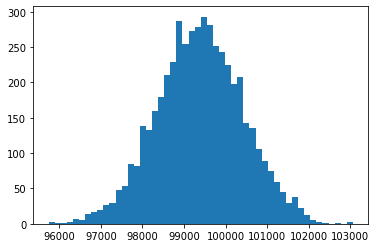

In [249]:
plt.hist(so_boot_distn, bins = 50), 
plt.show()

In [250]:
std_error = np.std(so_boot_distn, ddof = 1)
std_error

1030.603020695777

**Use Z-score to standarize the values**
> standardized value = (value - mean)/standard deviation

In [251]:
# calculate the z-score 
mean_camp_hyp = 101000
z_score = (mean_salary - mean_camp_hyp)/std_error
print('Is',z_score,'a high or low number?')

Is -1.551414209788176 a high or low number?


### 1.2 P-value
- A hypothese test has two competing hypotheses: H0 and Ha
 - H0: the existing idea
 - Ha: the new 'challenger' idea of the researcher
- Intially, H0 is assumed to be true
- The test ends in either 'reject H0' or 'fail to reject H0'
- **Reject H0** when the evidence from the sample is **significant**.
- **P value**: Probability of obtaining a result, assuming the H0 is true.
- **norm.cdf()**: culmulative density function from scipy.stats
 - Left-tailed test: norm.cdf(z_score, loc, scale)
 - Right-tailed test: 1 - norm.cdf(z_score, loc, scale)
>*Significance level* is "beyond or reasonable doubt" for hypothesis test. 
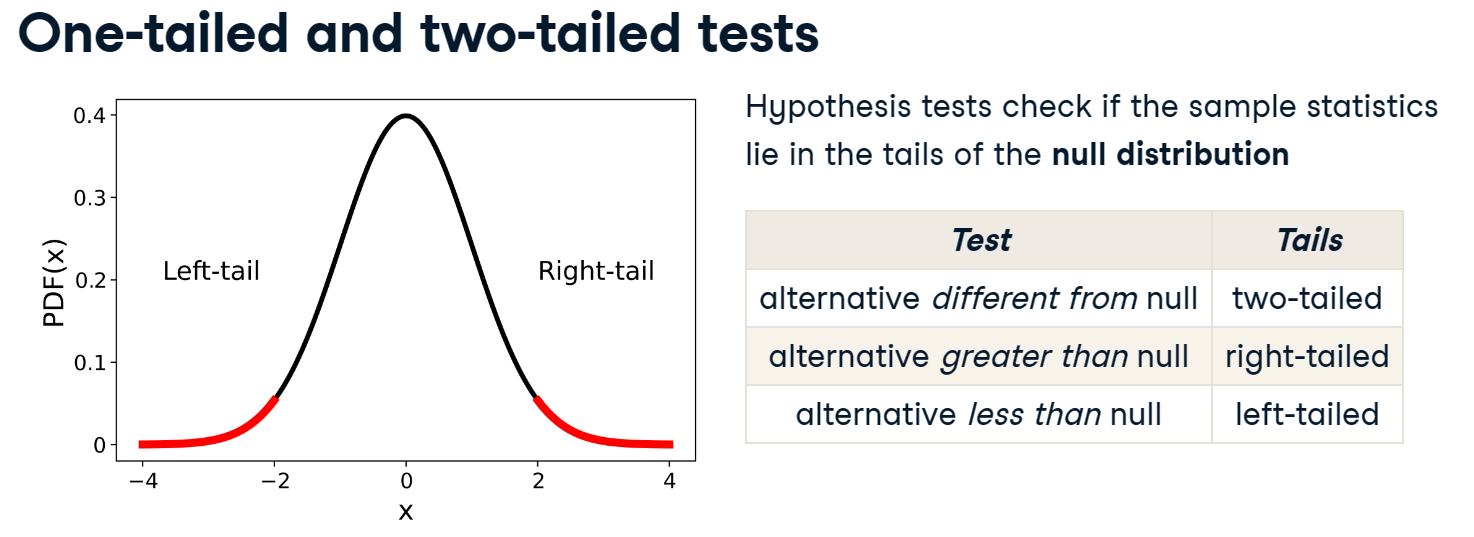
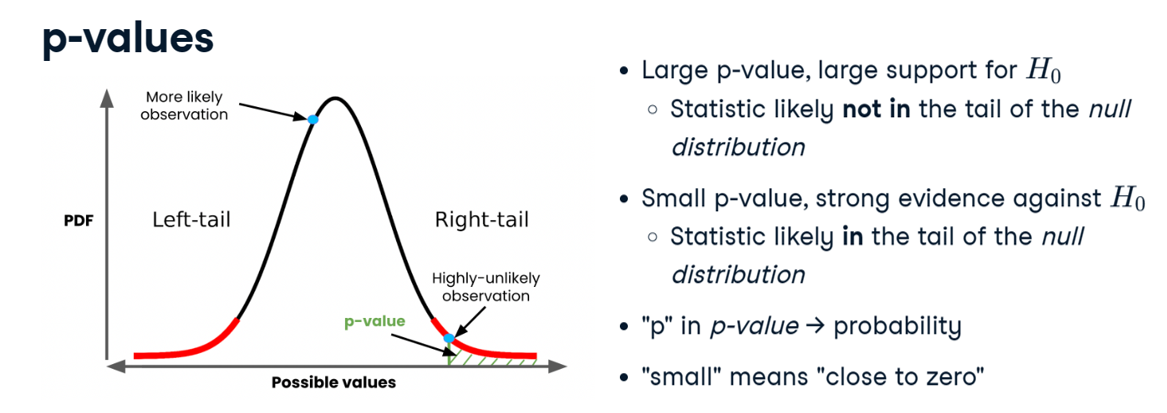

In [285]:
so['Age'].unique()

array(['middle', 'young', 'senior', 'child'], dtype=object)

In [283]:
# classify Age: before 18 -> young(0), 18 - 54 -> middle (1), above 54 -> senior(3) 
so['Age'] = so['Age'].map({
    '35 - 44 years old' :'middle', '18 - 24 years old' : 'young', 
    '25 - 34 years old':'middle',
    '45 - 54 years old':'middle', '55 - 64 years old':'senior',
       'Under 18 years old': 'child', '65 years or older':'senior'
})

In [284]:
so.dropna(subset = 'Age', axis = 0, inplace = True)

In [286]:
so.shape

(38255, 12)

In [287]:
so.to_csv('/QXJ/kaggle/data/so.csv')

In [292]:
# sample proportion 
prop = so['Age'].value_counts(normalize = True)
prop_middle_samp = prop.iloc[0]
prop_middle_samp

0.8127042216703699

> **H0**: 80% of developers is middle age (from 25 to 54 yrs old)
<br>
> **Ha**: more than 80% of developers is middle age -> **right tail test**

In [296]:
# bootstrap distribution 
age_boot_distn = []
for i in range(2000):
    age_boot_distn.append(so.sample(frac = 1, replace = True)['Age'].value_counts(normalize = True).iloc[0])
    
age_boot_distn[:5]

[0.8101424650372501,
 0.8130179061560581,
 0.8118938700823422,
 0.8115279048490394,
 0.8105607110181675]

In [297]:
# get std error 
std_error = np.std(age_boot_distn, ddof = 1)
std_error

0.0020104555938428

In [299]:
# calcualte z-score 
prop_middle_hyp = 0.80
z_score = (prop_middle_samp - prop_middle_hyp)/std_error
print('Is',z_score,'a high or low number?')

Is 6.319075989182601 a high or low number?


In [301]:
# calculate p-value
from scipy.stats import norm
p_value = 1 - norm.cdf(z_score, loc = 0, scale = 1)
p_value

1.3156598033248201e-10

### 1.3 Statistical significance
- P-values quantify evidence for the null hypothesis
- Large P-value -> fail to reject H0
- Smaller P-value -> reject H0
- **Cutoff point**: The **significance level** of a hypothesis test(α) is the threshold point for "beyond a reasonable doubt"
 - Common values of α are **0.2, 0.1, 0.05, 0.01**
 - If p <= α, reject H0, else fail to reject H0
 - α should be set **prior** to conducting the hypothesis test
- A confidence interval level of α is **1-α**, such as α = 0.05 -> 95% confidence level
 - using np.quantile(array, 0.025/0.975) to calculate CI
- Types of errors: 
> 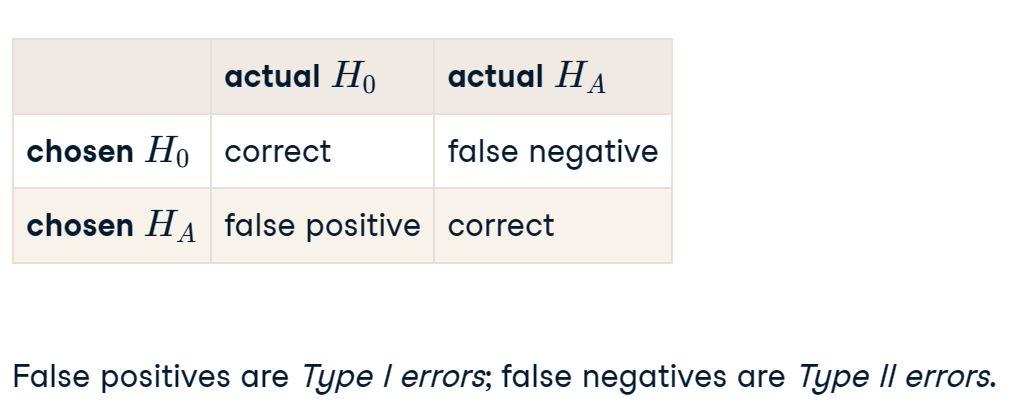

In [302]:
# add α to the last test 
# calculate p-values: one proportion vs. a value
alpha = 0.05
print(p_value)

1.3156598033248201e-10


In [305]:
# result 
if p_value <= alpha:
    print('reject H0, in favor of Ha')
else:
    print('fail to reject H0, in favor of H0')

reject H0, in favor of Ha


> **H0**: 80% of developers is middle age (from 25 to 54 yrs old)
<br>
> **Ha**: more than 80% of developers is middle age -> **right tail test**

In [307]:
# calculate confidence level
lower = np.quantile(age_boot_distn, 0.025)
upper = np.quantile(age_boot_distn, 0.975)
print((lower, upper))
# 80% is not included into the CI, reject H0, in favor of Ha. 

(0.8086524637302314, 0.8165220232649327)


## 2. Two-Sample and ANOVA Tests
- t-tests
- Calculating p_value from t-test
- paried t-tests
- ANOVA tests

### 2.1 Performing t-test
- Two-sample problems

In [310]:
so2 = pd.read_csv('/QXJ/kaggle/data/stack_overflow_compact.csv', index_col = 0)
so2.head()

Respondent  Hobby         Country  Gender                Age  \
1           3      1  United Kingdom     0.0  35 - 44 years old   
4           7      1    South Africa     0.0  18 - 24 years old   
5           8      1  United Kingdom     0.0  18 - 24 years old   
6           9      1   United States     0.0  18 - 24 years old   
8          11      1   United States     0.0  35 - 44 years old   

                                     FormalEducation  \
1           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Some college/university study without earning ...   
5           Bachelor’s degree (BA, BS, B.Eng., etc.)   
6  Some college/university study without earning ...   
8  Some college/university study without earning ...   

                                      UndergradMajor  \
1  A natural science (ex. biology, chemistry, phy...   
4  Computer science, computer engineering, or sof...   
5  Computer science, computer engineering, or sof...   
6  Computer science, computer engineering, or sof...   
8  Fine arts or performing arts (ex. graphic desi...   

                                             DevType       YearsCoding  \
1  Database administrator;DevOps specialist;Full-...  30 or more years   
4  Data or business analyst;Desktop or enterprise...         6-8 years   
5  Back-end developer;Database administrator;Fron...         6-8 years   
6  Back-end developer;Front-end developer;Full-st...        9-11 years   
8  Back-end developer;C-suite executive (CEO, CTO...  30 or more years   

  YearsCodingProf                                     EducationTypes  \
1     18-20 years  Taught yourself a new language, framework, or ...   
4       0-2 years  Taken a part-time in-person course in programm...   
5       3-5 years  Received on-the-job training in software devel...   
6       0-2 years  Received on-the-job training in software devel...   
8     21-23 years  Taken an online course in programming or softw...   

   ConvertedSalary  
1          70841.0  
4          21426.0  
5          41671.0  
6         120000.0  
8         250000.0

In [320]:
# add a columns 
so2['age_div'] = so2['Age']
so2['age_div'] = so2['age_div'].map({'35 - 44 years old': 'middle','45 - 54 years old':'middle', '18 - 24 years old':'young' , '25 - 34 years old':'young' })

In [321]:
so2['age_div'].unique()

array(['middle', 'young', nan], dtype=object)

In [322]:
so2.dropna(subset = 'age_div',axis = 0, inplace = True)

In [335]:
# classifying below 9 years experience : green_hand, above: senior
so2['YearsCoding_div']=so2['YearsCoding'].map(
{'30 or more years':'senior', '6-8 years':'green_hand', '9-11 years':'senior', 
    '15-17 years':'senior','3-5 years':'green_hand', '12-14 years':'senior', '0-2 years':'green_hand', '18-20 years':'senior',
    '24-26 years':'senior', '21-23 years':'senior', '27-29 years':'senior'})

In [337]:
so2['YearsCoding_div'].unique()

array(['senior', 'green_hand'], dtype=object)

In [338]:
so2.shape
so2.to_csv('/QXJ/kaggle/data/so_age.csv')

In [339]:
print(so2['age_div'].value_counts(normalize = True))
print(so2['YearsCoding_div'].value_counts(normalize = True))

young     0.742366
middle    0.257634
Name: age_div, dtype: float64
senior        0.541957
green_hand    0.458043
Name: YearsCoding_div, dtype: float64


In [340]:
so2.rename(columns = {'ConvertedSalary':'salary'}, inplace = True)

**Hypotheses**
> **H0**: The mean salary is the same for those who has years of coding above 9 yrs and below 9 yrs. 
<br>
-> μ(above_9) = μ(below_9) -> μ(above_9) - μ(below_9) = 0
<br>
**Ha**: the mean salary is greater for those who has years of coding above 9 yrs than below 9 yrs. -> **right-tailed test**
<br>
-> μ(above_9) = μ(below_9) -> μ(above_9) - μ(below_9) > 0

In [348]:
# calculate the mean of each group
# Use sampling mean to stand for population mean
div_mean = so2.groupby('YearsCoding_div')['salary'].mean()
print(div_samp_mean)

YearsCoding_div
green_hand     76950.786596
senior        116128.054829
Name: salary, dtype: float64


*To answer next: Is that increase statistically significant or could it be complained by sampling varability?*
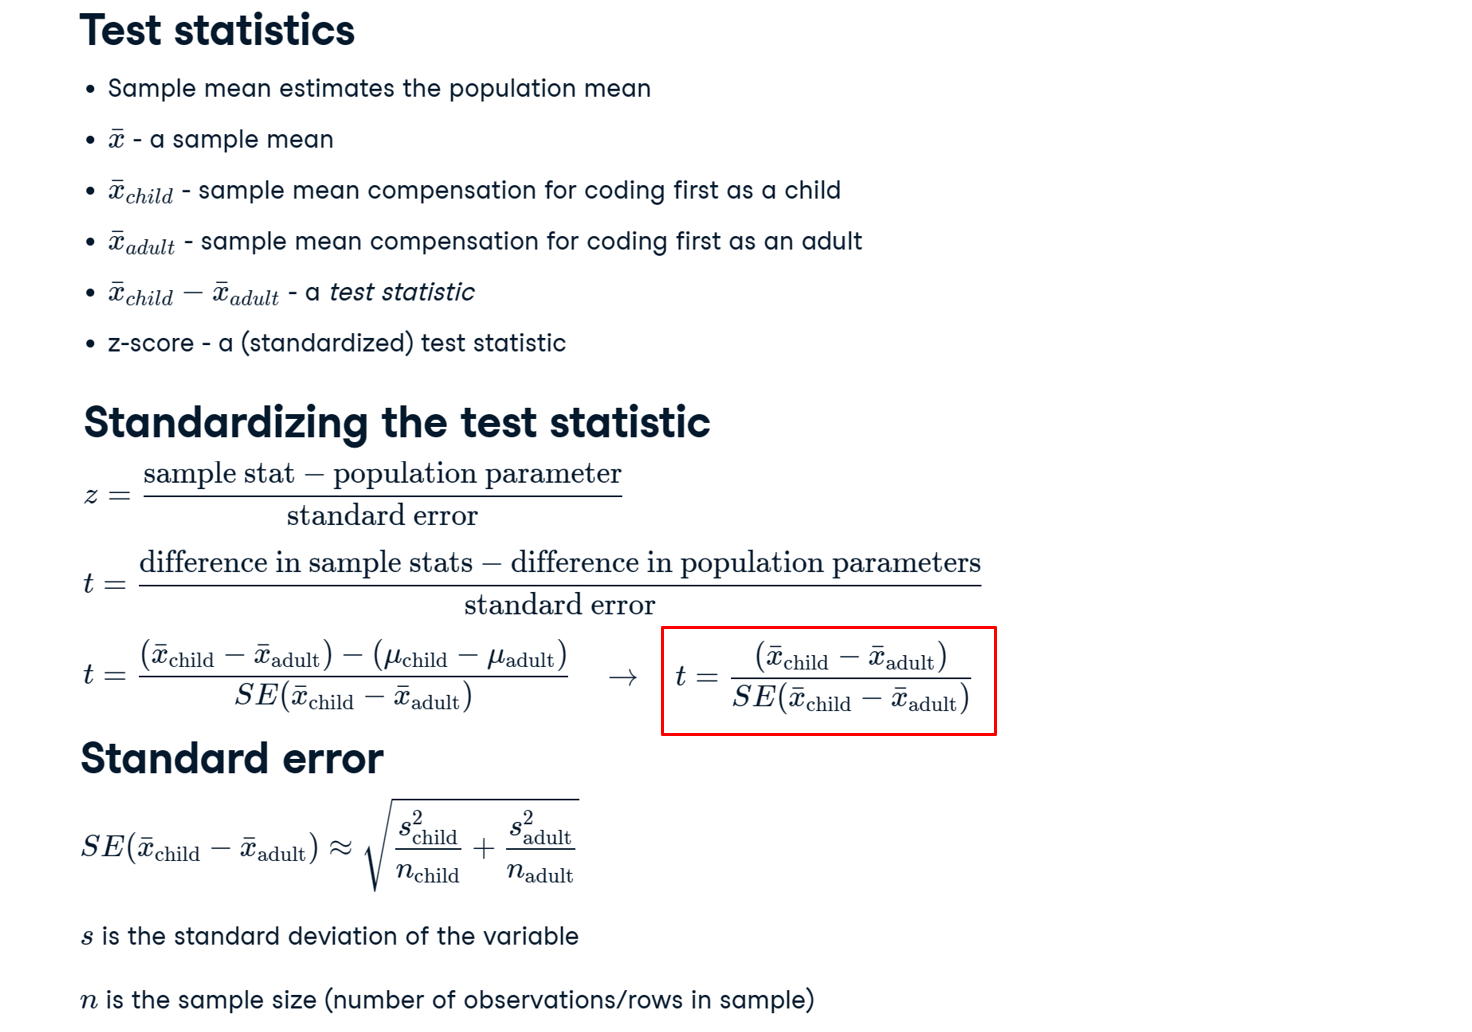

In [346]:
# calculate standard error of each group
div_std = so2.groupby('YearsCoding_div')['salary'].std()
div_std

YearsCoding_div
green_hand    197773.058295
senior        201177.554081
Name: salary, dtype: float64

In [347]:
# calculate sample size of each group
n = so2.groupby('YearsCoding_div')['salary'].count()
n

YearsCoding_div
green_hand    17249
senior        20409
Name: salary, dtype: int64

In [349]:
# calculate t-statistic
numerator = div_mean[1] - div_mean[0]
denominator = np.sqrt(div_std[1]** 2/n[1] + div_std[0]**2/n[0])
t_stat = numerator / denominator
t_stat

19.00223070795361

### 2.2 Calculating p-values from t-statistics
- t-statistic follows a t-ditribution
- t-distribution has a parameter called degree of freedem(df)
- Larger degrees of freedom, t-distribution gets closer to the normal distribution 
- Normal distribution -> t-distribution with infinite df 
- **df = n1+n2-2**: maximun number of logically independent values in the data sample
- z-statistics: needed when using **one sample statistic** to estimate a population parameter
- t-statistics: needed when using **multiple sample statistics** to estimate a population parameter
- Use **t-distribution CDF**, not normal CDF
>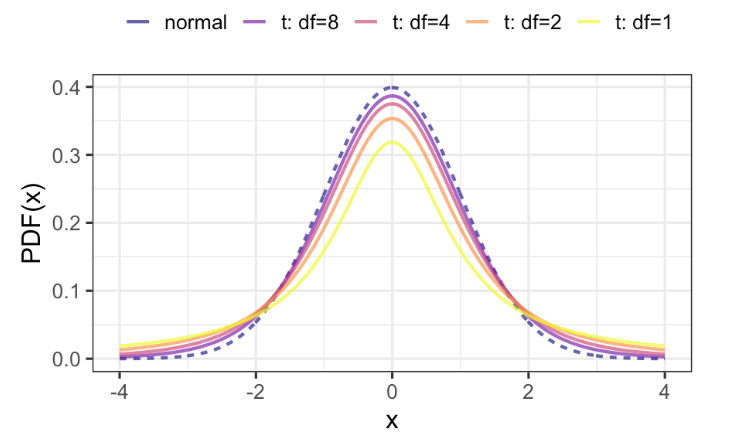

**Define siginifcant level: α**
<br>
α = 0.1
<br>
if p <= α then reject H0

In [350]:
df = n[0] + n[1] -2
df

37656

In [353]:
# calculate p-values: one proportion vs. a value
from scipy.stats import t
p_value = 1 - t.cdf(t_stat, df)
p_value

0.0

In [354]:
# result 
if p_value <= alpha:
    print('reject H0, in favor of Ha')
else:
    print('fail to reject H0, in favor of H0')
# The developers who have above 9 yrs of coding experience earn more than those under 9 yrs.

reject H0, in favor of Ha


**Hypotheses**
> **H0**: The mean salary is the same for those who has years of coding above 9 yrs and below 9 yrs. 
<br>
-> μ(above_9) = μ(below_9) -> μ(above_9) - μ(below_9) = 0
<br>
**Ha**: the mean salary is greater for those who has years of coding above 9 yrs than below 9 yrs. -> **right-tailed test**
<br>
-> μ(above_9) = μ(below_9) -> μ(above_9) - μ(below_9) > 0

*Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.*

### 2.3 Paired  t-tests
- Data is **paired** -> each voter percentage refers to the same characteristic, such as same country
 - want to capture patten of the pairs, such as voting pattern in model
>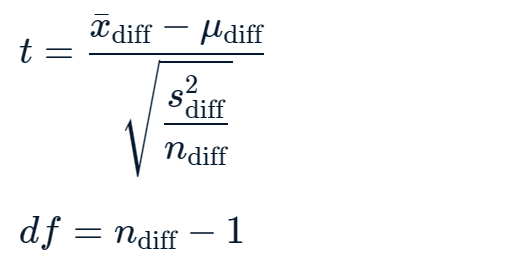

*Below test's sample size is too small, should use non-parametric test. Here is only demenstrate the proceure to use paired t-test.*

In [275]:
# create a dataset
state = ['Alabama', 'Arkansa', 'California','California', 'Wisconsin','Wisconsin','Wyoming','Alaska']
country = ['Hale','Nevada','Lake','Ventura','La Crosse', 'Lafayette','Weston','District 34']
repub_percent_08 = [38.95, 56.73, 38.89, 42.93, 37.49, 38.10, 76.68, 77.06]
repub_percent_12 = [37.13,58.98, 39.33, 45.25, 40.57, 41.67, 83.98,40.78]
vote = pd.DataFrame({'state':state, 'country':country, 
                     'repub_percent_08':repub_percent_08, 
                     'repub_percent_12':repub_percent_12})
vote.head()

state    country  repub_percent_08  repub_percent_12
0     Alabama       Hale             38.95             37.13
1     Arkansa     Nevada             56.73             58.98
2  California       Lake             38.89             39.33
3  California    Ventura             42.93             45.25
4   Wisconsin  La Crosse             37.49             40.57

**Question: was the % of republican candidate votes lower in 2008 than 2012?**
>**H0**:S2008 - S2012 = 0 -> μ2008 -μ2012 = 0
<br>
**Ha**: S2008 - S2012 > 0 -> μ2008 - μ2012 > 0
<br>
set α = 0.05 siginificance level

In [7]:
vote['diff'] = vote['repub_percent_08'] - vote['repub_percent_12']

In [425]:
xbar_diff = vote['diff'].mean()
xbar_diff

2.392500000000001

**New hypotheses:**
> H0: μdiff = 0
<br>
Ha: μdiff < 0 

In [426]:
n_diff = len(vote)
df = n_diff -1 
df 

7

In [427]:
s_diff = vote['diff'].std()
t_stat = (xbar_diff - 0)/np.sqrt(s_diff**2/n_diff)
t_stat

0.4855003808339135

In [428]:
from scipy.stats import t
p_value = t.cdf(t_stat, df)
p_value

0.6789259672701677

In [429]:
# result 
if p_value <= alpha:
    print('reject H0, in favor of Ha')
else:
    print('fail to reject H0, in favor of H0')

fail to reject H0, in favor of H0


**Testing differences between two mean using ttest()**

In [9]:
import pingouin
pingouin.ttest(x=vote['diff'],
               # H0 
              y = 0, 
               # Ha
              alternative = 'less')

T  dof alternative     p-val          CI95%  cohen-d   BF10  \
T-test  0.4855    7        less  0.678926  [-inf, 11.73]  0.17165  0.742   

           power  
T-test  0.018457

In [11]:
# another way to calculate paried test instead of caculating difference
pingouin.ttest(x = vote['repub_percent_08'],
               y = vote['repub_percent_12'], 
               # True as default 
               paired = True, 
               alternative = 'less')

T  dof alternative     p-val          CI95%   cohen-d   BF10  \
T-test  0.4855    7        less  0.678926  [-inf, 11.73]  0.144482  0.742   

           power  
T-test  0.021865

### 2.4 ANOVA tests
- A test for differences between grops 
- If the derived test p_value < alpha, which means there a sigifinicant different between at least two of the groups.
- If the result is siginicant, use pingouin paire-wise test 
- Add correction method to the test 
- p_value is below alpha, there is a siginificant difference among the those paire

*Want to compare the top 4 devTypes*

In [17]:
# create one sheet who are Full-stack developers
so4_1 = pd.read_csv('/QXJ/kaggle/data/so_age.csv', index_col = 0)

In [18]:
so4_1.head(2)

Respondent  Hobby         Country  Gender                Age  \
1           3      1  United Kingdom     0.0  35 - 44 years old   
4           7      1    South Africa     0.0  18 - 24 years old   

                                     FormalEducation  \
1           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Some college/university study without earning ...   

                                      UndergradMajor  \
1  A natural science (ex. biology, chemistry, phy...   
4  Computer science, computer engineering, or sof...   

                                             DevType       YearsCoding  \
1  Database administrator;DevOps specialist;Full-...  30 or more years   
4  Data or business analyst;Desktop or enterprise...         6-8 years   

  YearsCodingProf                                     EducationTypes  \
1     18-20 years  Taught yourself a new language, framework, or ...   
4       0-2 years  Taken a part-time in-person course in programm...   

   ConvertedSalary age_div YearsCoding_div  
1          70841.0  middle          senior  
4          21426.0   young      green_hand

In [21]:
so4_1['DevType'].value_counts(sort = True, ascending = False).tolist()

Full-stack developer                                                                                                                                                          2776
Back-end developer                                                                                                                                                            2752
Back-end developer;Front-end developer;Full-stack developer                                                                                                                   2158
Back-end developer;Full-stack developer                                                                                                                                       1619
Mobile developer                                                                                                                                                              1416
                                                                                                         

In [19]:
so4_1['new_dev'] = so4_1[so4_1['DevType'].str.contains ('Full-stack developer')]['DevType']
so4_1.head(2)

Respondent  Hobby         Country  Gender                Age  \
1           3      1  United Kingdom     0.0  35 - 44 years old   
4           7      1    South Africa     0.0  18 - 24 years old   

                                     FormalEducation  \
1           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Some college/university study without earning ...   

                                      UndergradMajor  \
1  A natural science (ex. biology, chemistry, phy...   
4  Computer science, computer engineering, or sof...   

                                             DevType       YearsCoding  \
1  Database administrator;DevOps specialist;Full-...  30 or more years   
4  Data or business analyst;Desktop or enterprise...         6-8 years   

  YearsCodingProf                                     EducationTypes  \
1     18-20 years  Taught yourself a new language, framework, or ...   
4       0-2 years  Taken a part-time in-person course in programm...   

   ConvertedSalary age_div YearsCoding_div  \
1          70841.0  middle          senior   
4          21426.0   young      green_hand   

                                             new_dev  
1  Database administrator;DevOps specialist;Full-...  
4                                                NaN

In [25]:
so4_1.dropna(subset = 'new_dev', axis = 0, inplace = True)
so4_1.isna().sum()
so4_1.to_csv('/QXJ/kaggle/data/so4-1.csv')

In [28]:
so4_1 = so4_1.assign(new_dev ='Full-stack developer')
so4_1.shape
so4_1.to_csv('/QXJ/kaggle/data/so4-1.csv')

In [64]:
# create one sheet who are data scientist
so4_2 = pd.read_csv('/QXJ/kaggle/data/so_age.csv', index_col = 0)
pd.set_option("display.max_rows", None)
so4_2['DevType'].value_counts()

Full-stack developer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 2776
Back-end developer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [65]:
so4_2['new_dev'] = so4_2[so4_2['DevType'].str.contains('Data scientist')]['DevType']
so4_2.dropna(subset = 'new_dev', axis = 0, inplace = True)
so4_2 = so4_2.assign(new_dev = 'Data Scientist')
so4_2.head(2)
so4_2.shape
so4_2.to_csv('/QXJ/kaggle/data/so4-2.csv')

In [66]:
# create one sheet who are Front-end, back-end and mobile developers
so4_3 = pd.read_csv('/QXJ/kaggle/data/so_age.csv', index_col = 0)

In [67]:
lst =['Front-end developer','Back-end developer','Mobile developer']
so4_3 = so4_3[so4_3['DevType'].isin(lst)]
so4_3['new_dev'] = so4_3['DevType']
so4_3.shape
so4_3.to_csv('/QXJ/kaggle/data/so4-3.csv')

In [76]:
so_dev  = pd.concat([so4_1, so4_2, so4_3], ignore_index=True)
so_dev.head(2)
so_dev.shape
so_dev.to_csv('/QXJ/kaggle/data/so_dev.csv')

In [77]:
so_dev['new_dev'].value_counts()
# Clean dataset to five categorise

Full-stack developer    20735
Data Scientist           3153
Back-end developer       2752
Mobile developer         1416
Front-end developer      1063
Name: new_dev, dtype: int64

**Question: Is mean annual salary different for different roles of developer?**
> **H0**: the mean of annual salary is same for all the roles of developer.
<br>
**Ha**: the mean of annual salary is different for some roles of developer 
p_value < alpha, there is a siginicant difference
<br>
ANOVA - Parewise tests

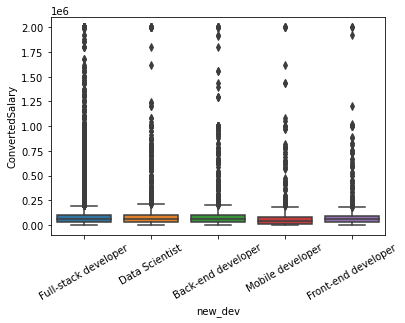

In [87]:
# visualize multiple distribution
ax = sns.boxplot(y = 'ConvertedSalary', x = 'new_dev', data = so_dev )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()
# to see if there is significantly different, we need to use hypothese test

In [96]:
#  start from α
alpha = 0.2

import pingouin
# dv - dependent variable, between - groups to compare
result = pingouin.anova(data = so_dev, dv = 'ConvertedSalary', between = 'new_dev')
result

Source  ddof1  ddof2         F     p-unc       np2
0  new_dev      4  29114  4.786855  0.000737  0.000657

In [107]:
print('P_value is', str(result['p-unc']))
# 0.000737 < alpha 
# that means at least two of the categories of dev has significant difference.
# But it does not tell us which two categores they are 
# Next steps: to use parewise test to compare
# There are 10 ways of choosing two types to compare, so we need repeat 10 times

P_value is 0    0.000737
Name: p-unc, dtype: float64


> 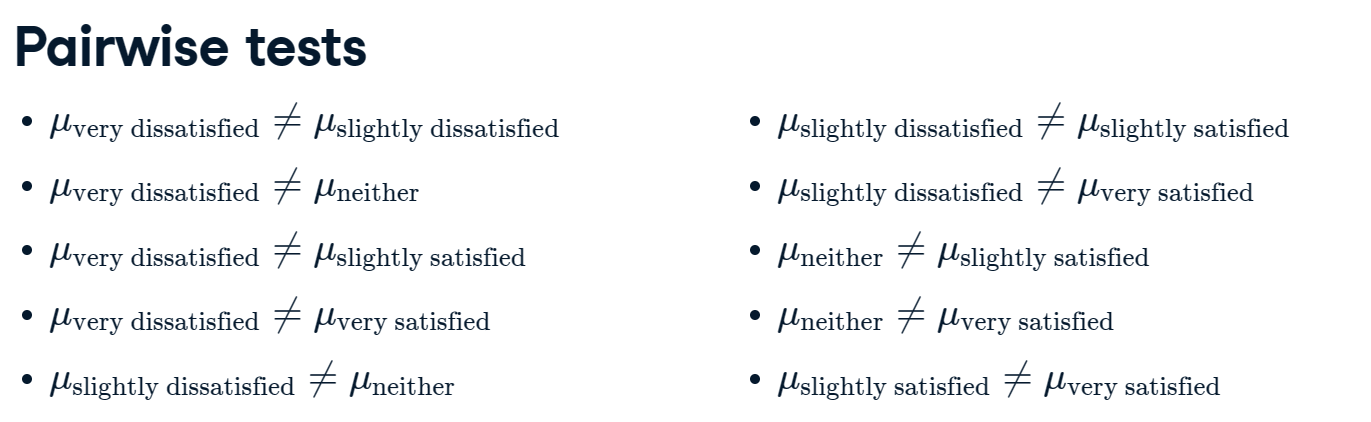
**At 20 groups, it is almost garanteed you will get 1 case of false positive - type error I -> Bonferroni correction**
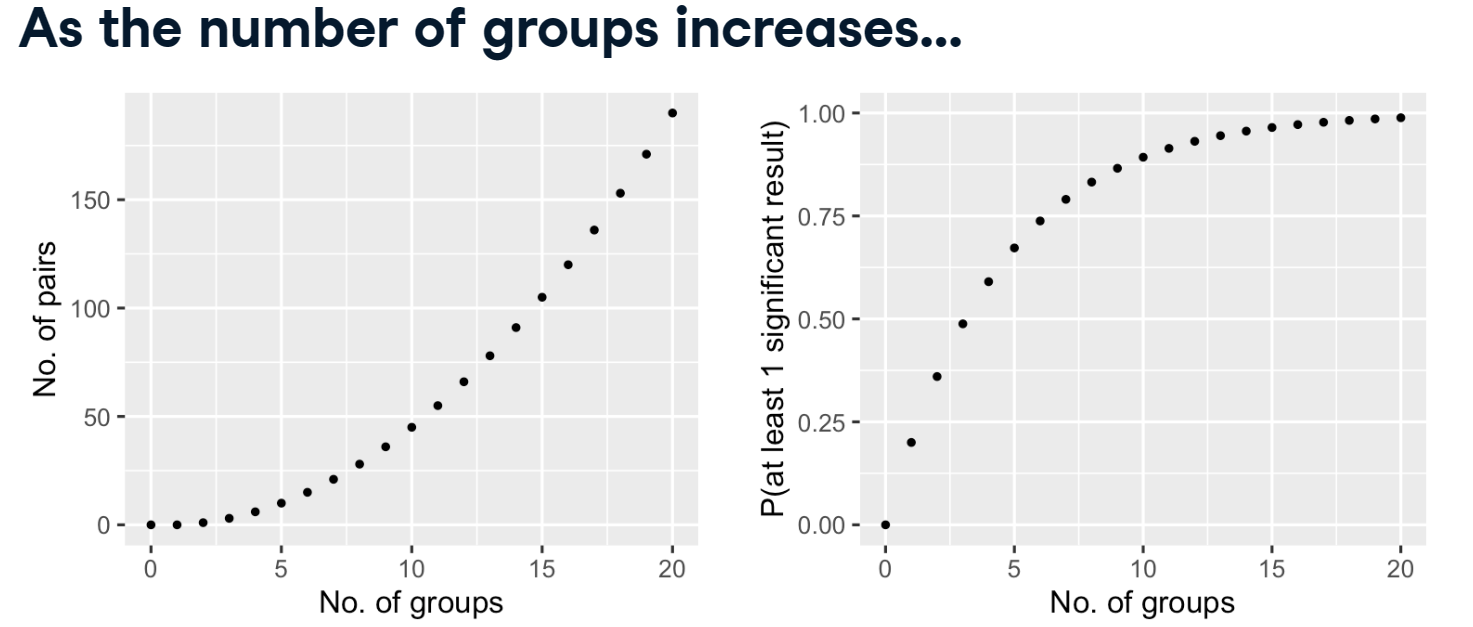

In [109]:
# pairwise_test 
pingouin.pairwise_tests(data = so_dev,
                        dv = 'ConvertedSalary',
                        between = 'new_dev',
                        padjust = 'none')

Contrast                     A                     B  Paired  Parametric  \
0  new_dev    Back-end developer        Data Scientist   False        True   
1  new_dev    Back-end developer   Front-end developer   False        True   
2  new_dev    Back-end developer  Full-stack developer   False        True   
3  new_dev    Back-end developer      Mobile developer   False        True   
4  new_dev        Data Scientist   Front-end developer   False        True   
5  new_dev        Data Scientist  Full-stack developer   False        True   
6  new_dev        Data Scientist      Mobile developer   False        True   
7  new_dev   Front-end developer  Full-stack developer   False        True   
8  new_dev   Front-end developer      Mobile developer   False        True   
9  new_dev  Full-stack developer      Mobile developer   False        True   

          T          dof alternative     p-unc     BF10    hedges  
0 -0.221961  5794.178622   two-sided  0.824352     0.03 -0.005790  
1  2.022625  2200.390571   two-sided  0.043233    0.311  0.068693  
2  0.183812  3549.222193   two-sided  0.854171    0.023  0.003681  
3  3.649748  3228.080554   two-sided  0.000267   27.717  0.114132  
4  2.248498  2077.166707   two-sided  0.024649    0.493  0.074484  
5  0.497534  4207.574582   two-sided  0.618839    0.024  0.009387  
6  3.947290  3101.725603   two-sided  0.000081   83.468  0.119782  
7 -2.267399  1215.577905   two-sided  0.023541    0.458 -0.061966  
8  1.217150  2286.073628   two-sided  0.223673    0.095  0.049388  
9  4.370408  1690.848675   two-sided  0.000013  421.153  0.104715

In [110]:
pingouin.pairwise_tests(data = so_dev, 
                       dv = 'ConvertedSalary',
                       between = 'new_dev',
                       padjust = 'bonf')

Contrast                     A                     B  Paired  Parametric  \
0  new_dev    Back-end developer        Data Scientist   False        True   
1  new_dev    Back-end developer   Front-end developer   False        True   
2  new_dev    Back-end developer  Full-stack developer   False        True   
3  new_dev    Back-end developer      Mobile developer   False        True   
4  new_dev        Data Scientist   Front-end developer   False        True   
5  new_dev        Data Scientist  Full-stack developer   False        True   
6  new_dev        Data Scientist      Mobile developer   False        True   
7  new_dev   Front-end developer  Full-stack developer   False        True   
8  new_dev   Front-end developer      Mobile developer   False        True   
9  new_dev  Full-stack developer      Mobile developer   False        True   

          T          dof alternative     p-unc    p-corr p-adjust     BF10  \
0 -0.221961  5794.178622   two-sided  0.824352  1.000000     bonf     0.03   
1  2.022625  2200.390571   two-sided  0.043233  0.432326     bonf    0.311   
2  0.183812  3549.222193   two-sided  0.854171  1.000000     bonf    0.023   
3  3.649748  3228.080554   two-sided  0.000267  0.002667     bonf   27.717   
4  2.248498  2077.166707   two-sided  0.024649  0.246489     bonf    0.493   
5  0.497534  4207.574582   two-sided  0.618839  1.000000     bonf    0.024   
6  3.947290  3101.725603   two-sided  0.000081  0.000808     bonf   83.468   
7 -2.267399  1215.577905   two-sided  0.023541  0.235409     bonf    0.458   
8  1.217150  2286.073628   two-sided  0.223673  1.000000     bonf    0.095   
9  4.370408  1690.848675   two-sided  0.000013  0.000132     bonf  421.153   

     hedges  
0 -0.005790  
1  0.068693  
2  0.003681  
3  0.114132  
4  0.074484  
5  0.009387  
6  0.119782  
7 -0.061966  
8  0.049388  
9  0.104715

## 3. Proportion test
- One-sample proportion tests
- Two sample proportion tests
- Chi-square test of independence
- Chi-square goodness of fit tests

### 3.1 One-sample proportion tests
- standardized test statistic for proportions
 - p: population proportion(unknown population parameter)
 - p_hat: sample proportion(sample statistic)
 - p0: hypothesized population proportion 
- why use z instead of t? 
 - t-distribution provides extra caution against mistakenly  rejectiing H0
 - However, in proportion test, we only use p_hat, so it is not need to use t-distribution 
 > 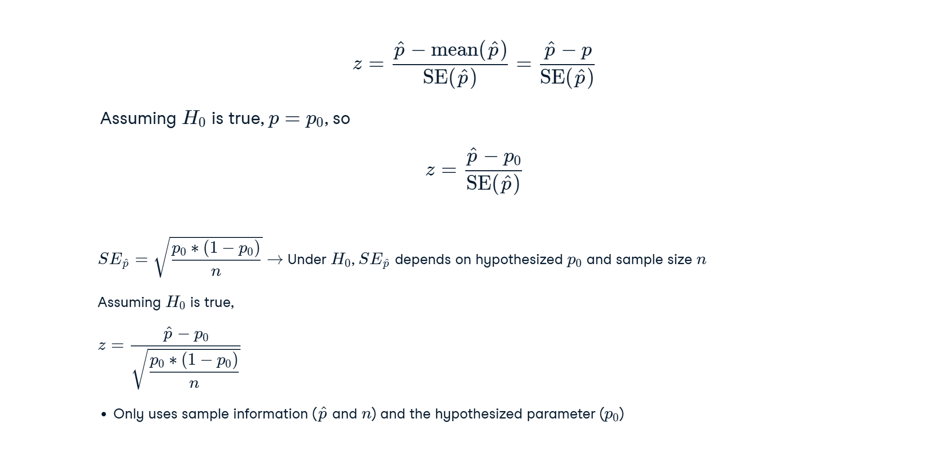

In [113]:
so_dev['YearsCoding_div'].unique()

array(['senior', 'green_hand'], dtype=object)

**One-sample proportion test**
>**H0**: Proportion of Stack Overflow users under 9 years of coding(green_hand) is 0.5
<br>
**Ha**:Proportion of Stack Overflow users under 9 years of coding(green_hand) is not 0.5
<br>
**alpha = 0.1**

In [118]:
so_dev['YearsCoding_div'].value_counts(normalize = True)

senior        0.546516
green_hand    0.453484
Name: YearsCoding_div, dtype: float64

In [116]:
p_hat = (so_dev['YearsCoding_div'] == 'green_hand').mean()
p_hat

0.45348397953226416

In [128]:
p_0 = 0.5
n = len(so_dev)
n

29119

In [129]:
# calculate z-score
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0)/n)
z_score = numerator / denominator
print('z score is', z_score)

z score is -15.875257443398919


In [130]:
# calculate P-value
from scipy.stats import norm
p_value = 2 * (1 - norm.cdf(z_score))
print('p_value is', p_value)

p_value is 2.0


In [131]:
p_value < alpha
# P_vaue > alpha = 0.1, fail to reject H0

False

### 3.2 Two-sample proportion tests
- assuming H0 is true, p_0  = 0
>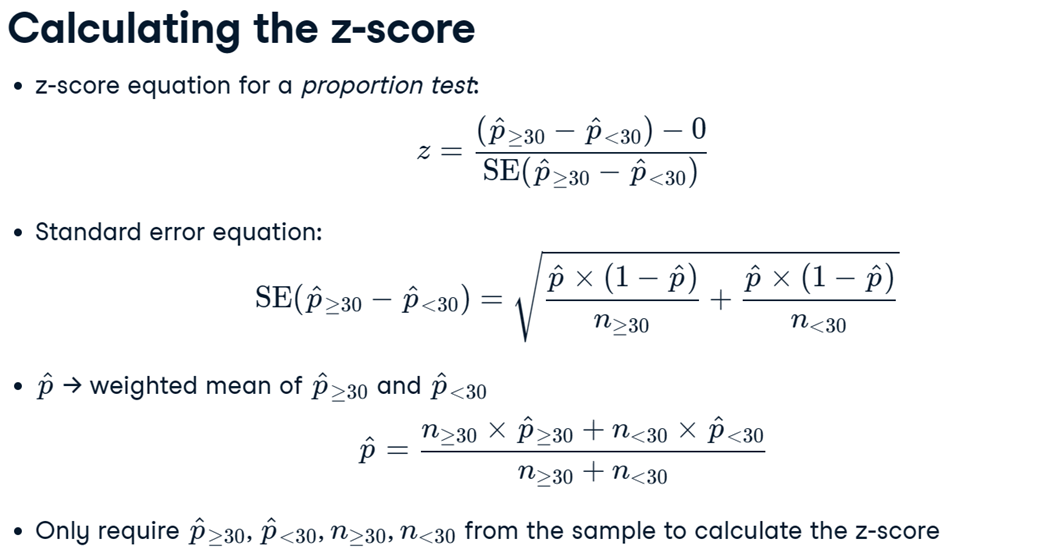

**Compare two proportions**
>**H0**: Proportion of hobbyist users is the same for those under 9 years of coding(green_hand) -> *P>=9 - P<=9 = 0*
<br>
**Ha**:Proportion of hobbyist users is different for those under 9 years of coding(green_hand) -> *P>=9 - P<=9 <> 0*
<br>
**alpha = 0.05**

In [162]:
so_dev = pd.read_csv('/QXJ/kaggle/data/so_dev.csv', index_col = 0)

In [164]:
# calculate p_hats
p_hats = so_dev.groupby('YearsCoding_div')['Hobby'].value_counts(normalize = True)
p_hats

YearsCoding_div  Hobby
green_hand       1        0.816509
                 0        0.183491
senior           1        0.827762
                 0        0.172238
Name: Hobby, dtype: float64

In [165]:
n = so_dev.groupby('YearsCoding_div')['Hobby'].count()
n

YearsCoding_div
green_hand    13205
senior        15914
Name: Hobby, dtype: int64

In [166]:
# use pandas multiindex subsetting
p_hat_above_9 = p_hats[('green_hand',1)]
p_hat_below_9 = p_hats[('senior',1)]
print(p_hat_above_9, p_hat_below_9 )

0.8165088981446422 0.8277617192409199


In [168]:
# pandas subset n
n_above_9 = n['senior']
n_below_9 = n['green_hand']
print(n_above_9, n_below_9)

15914 13205


In [187]:
# calculate z_score
p_hat = (n_above_9 * p_hat_above_9 + n_below_9 * p_hat_below_9)/(n_above_9 + n_below_9)
std_error = np.sqrt((p_hat * (1-p_hat)/n_above_9 + p_hat*(1-p_hat)/n_below_9))
z_score = (p_hat_above_9 - p_hat_below_9) / std_error
print('z_score is:', z_score)

z_score is: -2.49698388128613


In [189]:
# calculate p_value
p_value = (1 - norm.cdf(z_score))*2
print('P-value is:',p_value)

P-value is: 1.9874745349993983


In [171]:
p_value < alpha # fail to reject H0 

False

**Use proportion_ztest function from statsmodel**
<br> *requires two objects as numpy arrays*
- the number of hobbyists in each age group
- the number of rows in each age group

In [172]:
# calculate p_hats
p_hats = so_dev.groupby('YearsCoding_div')['Hobby'].value_counts()
p_hats

YearsCoding_div  Hobby
green_hand       1        10782
                 0         2423
senior           1        13173
                 0         2741
Name: Hobby, dtype: int64

In [181]:
n_hobbyists = np.array([13173, 10782])
n_rows = np.array([13173 + 2741, 10782 + 2423])
from statsmodels.stats.proportion import proportions_ztest
z_score, p_value = proportions_ztest(count=n_hobbyists,nobs = n_rows,
                                    alternative = 'two-sided')
print((z_score, p_value))
print(p_value < 0.05)
# reject the H0
# the years of coding is associated with hobby or not

(2.502749122164683, 0.012323286319008453)
True


### 3.3 Chi-square test of independence
- proportion test for multi-groups
- Test for independence of varaibles
  - if the porportion of hobbiest was same for the each category, the variables would be considered statistically independent. 
- **degree of freedom(df): (No. of response categories - 1) * (No. of explanatory categories -1)**
- In Chi2 test, observed and expected counts squared must be **non-negative**  -> means Chi2 tests are almost always right-tailed tests
- Like the t-distribution, the chi-square distribution has degrees of freedom and non-centrality parameters. When these numbers are large, the chi-square distribution can be approximated by a normal distribution.
> **Statistical independence**:proportion of successes in the response variable is the same across all categories of the explanatory variable

In [191]:
# correction argument specifies whether or not to apply Yates' continuity correction
# a fudge factor, 
expected, observed, stats = pingouin.chi2_independence(data = so_dev, 
                                                      x = 'Hobby',
                                                      y = 'YearsCoding_div',
                                                      correction = False)
print(stats)

                 test    lambda      chi2  dof      pval    cramer     power
0             pearson  1.000000  6.263753  1.0  0.012323  0.014667  0.706365
1        cressie-read  0.666667  6.260728  1.0  0.012344  0.014663  0.706157
2      log-likelihood  0.000000  6.254975  1.0  0.012385  0.014656  0.705761
3       freeman-tukey -0.500000  6.250918  1.0  0.012413  0.014652  0.705481
4  mod-log-likelihood -1.000000  6.247081  1.0  0.012440  0.014647  0.705217
5              neyman -2.000000  6.240067  1.0  0.012489  0.014639  0.704732


In [204]:
# look at pearson result
chi2 = 6.263 
p_value = 0.0123
z_score = np.sqrt(chi2)
z_score

2.5025986494042547

In [195]:
so_dev.columns

Index(['Respondent', 'Hobby', 'Country', 'Gender', 'Age', 'FormalEducation',
       'UndergradMajor', 'DevType', 'YearsCoding', 'YearsCodingProf',
       'EducationTypes', 'ConvertedSalary', 'age_div', 'YearsCoding_div',
       'new_dev'],
      dtype='object')

In [197]:
# years of coding above or below 9 yrs
so_dev['YearsCoding_div'].value_counts()

senior        15914
green_hand    13205
Name: YearsCoding_div, dtype: int64

In [198]:
# roles of developers 
so_dev['new_dev'].value_counts()

Full-stack developer    20735
Data Scientist           3153
Back-end developer       2752
Mobile developer         1416
Front-end developer      1063
Name: new_dev, dtype: int64

**Declaring the hypothesis**
<br>
- **Test statistic denoted X^2**
- **Assuming independence, how far away are the observed results from the expected value?**
<br>
-*Years of coding is the response variable and the role of developer is the explanatory varaible.*
>**H0**: years of coding are independent of roles of developers
> **Ha**: years of coding are not independent of roles of developers

In [199]:
alpha = 0.1

In [200]:
props = so_dev.groupby('new_dev')['YearsCoding_div'].value_counts(normalize = True)
props

new_dev               YearsCoding_div
Back-end developer    senior             0.526526
                      green_hand         0.473474
Data Scientist        senior             0.520140
                      green_hand         0.479860
Front-end developer   green_hand         0.662277
                      senior             0.337723
Full-stack developer  senior             0.575211
                      green_hand         0.424789
Mobile developer      green_hand         0.619350
                      senior             0.380650
Name: YearsCoding_div, dtype: float64

<AxesSubplot:xlabel='new_dev'>

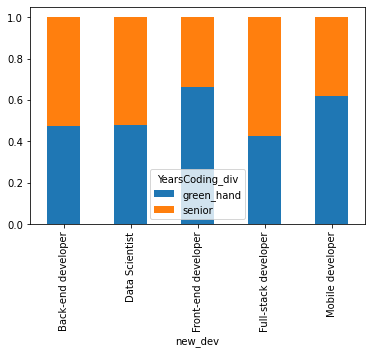

In [202]:
wide_props = props.unstack()
wide_props
wide_props.plot(kind = 'bar', stacked = True)

*Use Chi-squared to test if there is sigificant different between the groups*

In [203]:
# df:(resp no. -1) * (explanatory no. - 1)
df = (2-1) * (5-1)
df

4

In [206]:
print(p_value < alpha)
# reject H0, in favor of Ha
# Ha: years of coding are not independent of roles of developers

True


**Swapping the variables?**

<AxesSubplot:xlabel='YearsCoding_div'>

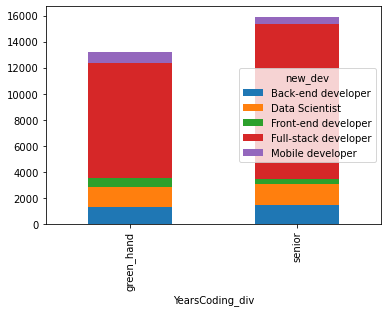

In [208]:
props = so_dev.groupby('YearsCoding_div')['new_dev'].value_counts()
wide_props = props.unstack()
wide_props.plot(kind='bar', stacked = True)

In [212]:
expected, observed, stats = pingouin.chi2_independence(data = so_dev,
                                                      x = 'YearsCoding_div',
                                                      y = 'new_dev')
r = stats[stats['test']=='pearson']
r

test  lambda        chi2  dof          pval    cramer  power
0  pearson     1.0  426.345107  4.0  5.637676e-91  0.121002    1.0

In [213]:
p_value = r['pval']
p_value < alpha 
# reject H0, in favor of Ha

0    True
Name: pval, dtype: bool

### 3.4 Chi-square goodness of fit tests
- another variant of the Chi2 to compare a singel categorical variable to a hypothesized distribution
 - define a hypothese distribution 
 - use chisquare() to compare the observed distribution to hypothesized one to see if they match 

In [245]:
degree_counts = so_dev['FormalEducation'].value_counts()
degree_counts

Bachelor’s degree (BA, BS, B.Eng., etc.)                  15410
Master’s degree (MA, MS, M.Eng., MBA, etc.)                7552
Some college/university study without earning a degree     3916
Associate degree                                            986
Other doctoral degree (Ph.D, Ed.D., etc.)                   890
Professional degree (JD, MD, etc.)                          365
Name: FormalEducation, dtype: int64

In [246]:
degree_counts = degree_counts.rename_axis('Education')\
.reset_index(name = 'n').sort_values('Education')
degree_counts

Education      n
3                                   Associate degree    986
0           Bachelor’s degree (BA, BS, B.Eng., etc.)  15410
1        Master’s degree (MA, MS, M.Eng., MBA, etc.)   7552
4          Other doctoral degree (Ph.D, Ed.D., etc.)    890
5                 Professional degree (JD, MD, etc.)    365
2  Some college/university study without earning ...   3916

In [247]:
degree_counts['education'] = degree_counts['Education'].map({
    'Bachelor’s degree (BA, BS, B.Eng., etc.)':'bachelor',
    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'master',
    'Some college/university study without earning a degree':'no_degree',
    'Associate degree':'associate',
    'Other doctoral degree (Ph.D, Ed.D., etc.)':'doctor',
    'Professional degree (JD, MD, etc.)':'prof_degree'
    })
degree_counts.drop('Education', axis = 1, inplace = True)
degree_counts

n    education
3    986    associate
0  15410     bachelor
1   7552       master
4    890       doctor
5    365  prof_degree
2   3916    no_degree

In [268]:
# declaring the hypotheses
hypothesized = pd.DataFrame({
    'education':['associate', 'bachelor', 'master', 'doctor', 'prof_degree','no_degree'],
    'prop':[0.04 ,0.5, 0.25, 0.04,0.02,0.15]
})
hypothesized

education  prop
0    associate  0.04
1     bachelor  0.50
2       master  0.25
3       doctor  0.04
4  prof_degree  0.02
5    no_degree  0.15

**X2 measures how far the observed sample distribtion of proportions is from the hypothesized distribution?**
>**H0**:The sample matches the hypothesized distribution
<br>
**Ha**:The sample dose not match the hypothesized distribution

In [250]:
alpha = 0.1

In [269]:
n_total = len(so_dev)
print(n_total)
hypothesized['n'] = hypothesized['prop'] * n_total
hypothesized

29119


education  prop         n
0    associate  0.04   1164.76
1     bachelor  0.50  14559.50
2       master  0.25   7279.75
3       doctor  0.04   1164.76
4  prof_degree  0.02    582.38
5    no_degree  0.15   4367.85

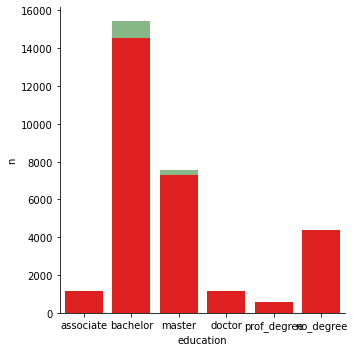

In [270]:
# observed counts
sns.catplot(data = degree_counts, x = 'education', y = 'n', kind='bar', color = 'green',alpha = 0.5)
sns.barplot(data = hypothesized, x='education', y='n', color = 'red')
plt.show()

In [273]:
# test how well our hypothesized data fiststhe observed data
from scipy.stats import chisquare
gof_test = chisquare(f_obs = degree_counts['n'], f_exp = hypothesized['n'])
gof_test

Power_divergenceResult(statistic=279.99627963414486, pvalue=1.9942171570451358e-58)

In [272]:
p_value = 1.9942171570451358e-58
print(p_value < alpha)
# reject H0, in favor of Ha: the sample dose not match the hypothesized distribution

True


## 4. Non-Parametric Tests
- Parametric tests: assumptions, consequences and solutions
- Non parametric tests: 
 - Wilcoxon-signed rank test: paired t-test
 - Wilcoxon-Mann_Whitney test (Mann Whitney U test): unpaired t-tests
 - Kruskal-Wallis test: ANOVA test

### 4.1 Assumptions in hypothesis testing
- Each hypothesis test, we made assumptions about the data
- It is only when these assumptions are met, it is appropriate to use hypothesis test
1. **Randomness**
**Assumption**
> The samples are readom subsets of larger population 


**Consequence**: Sample is not representative of population
<br>
**How to check this**:
- Understand how your data was collected 
- Speak to the data collector/domain expert


2. **Independence of observations**
**Assumption**
> Each observation(row) in the dataset is independent


**Consequence**: Increase chance of false negative/positive errors.
<br>
**How to check this**:
- Understand how your data was collected 

3. Large sample size
**Assumption**
> The samples is big enough to mitigate uncertainty, so that the Central Limit Theorem applies. -> can be assumed to be normal distribution


**Consequence**: 
- Wider confidence intervals 
- Increased chance of false negative/positve errors
<br>

**How to check this**:
- It depends on the test
>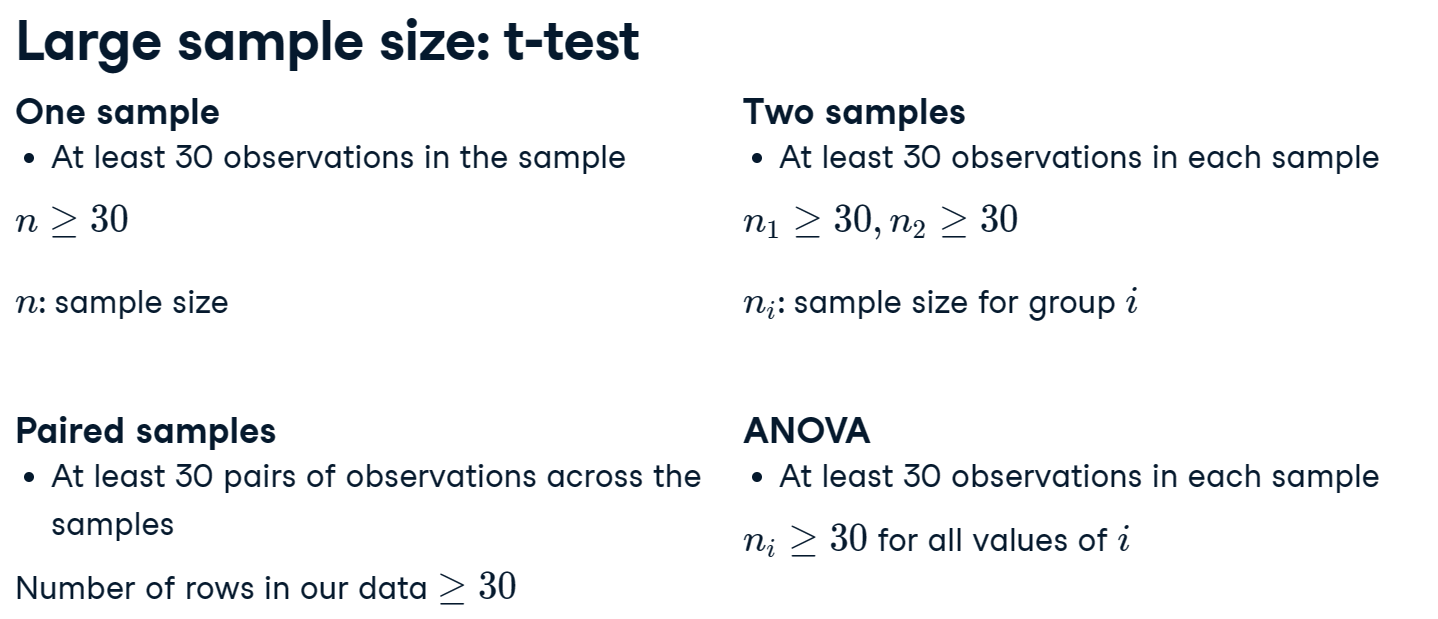
 - *The paired samples can be below 30 pairs but the important is null distribution appears normal*
>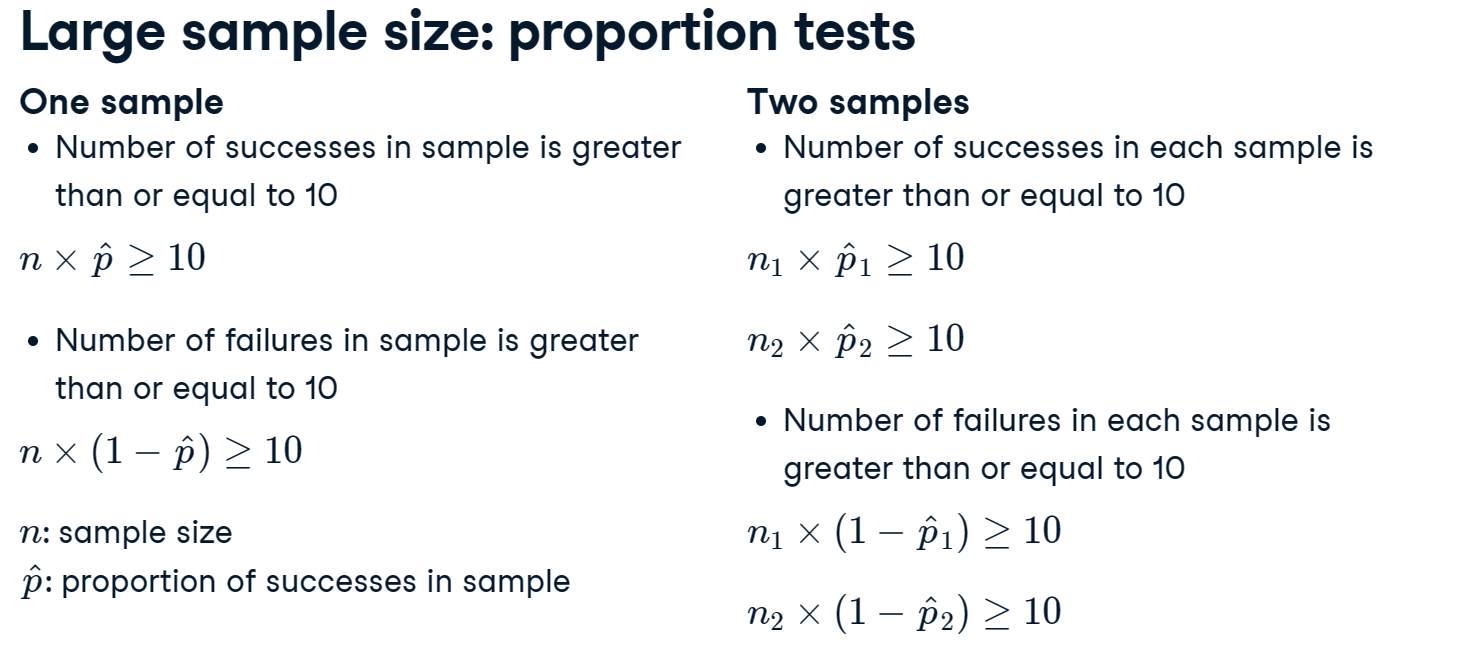
>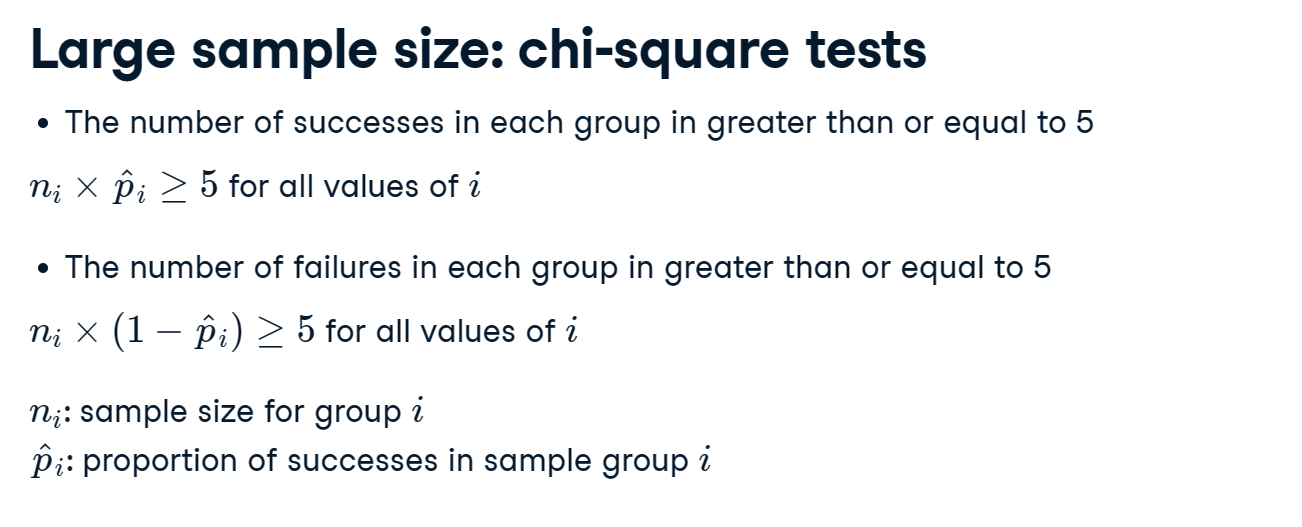

> **Inspect whether the counts are big enough ->
print((counts >= 30).all())**

**Sanity check**
> if the bootstrap distribution does not look normal, assumptions likely are not valid. 
- Revisit data collection to check for **randomness, independence and sample size**

### 4.2 Non-parametric tests
- z-test, t-test and ANOVA are all parametric tests, all based on 
 - assuming that the population is normal distributed
 - require sufficiently large sample sizes 
- In situations we are not sure about those assumptions, we use non_parametric tests: 
  - Non-parametric tests avoid the parametric assumptions and conditions
  - Many non_parametric tests use **ranks** of the data
  - Non-parametric tests are more reliable than parametric tests for small sample sizes and when data isn't normally distributed

In [274]:
x = [1, 15, 3, 10, 6]
from scipy.stats import rankdata
rankdata(x)

array([1., 5., 2., 4., 3.])

### Wilcoxon-signed rank test
- Developed by Frank Wilcoxon in 1945
- One of the first non-parametric procedures
- Works on the ranked absolute differences between the pairs of data 
 - Traditional:
  - calculate the paired differences
  - get the absolute number of the differences
  - rank the absolute number 
  - add the rank number, get T_plus and T_minus
  - get the mininal value to those Ts = W 
  - compare W to alpha
- pingouin.wilcoxon()

In [287]:
# get the difference of the comparing columns
vote['diff'] = vote['repub_percent_08'] - vote['repub_percent_12']
vote.head(2)

state country  repub_percent_08  repub_percent_12  diff  rank_abs_diff
0  Alabama    Hale             38.95             37.13  1.82            2.0
1  Arkansa  Nevada             56.73             58.98 -2.25            3.0

In [288]:
# get the absolute number of the difference
vote['diff_abs'] = vote['diff'].abs()
vote

state      country  repub_percent_08  repub_percent_12   diff  \
0     Alabama         Hale             38.95             37.13   1.82   
1     Arkansa       Nevada             56.73             58.98  -2.25   
2  California         Lake             38.89             39.33  -0.44   
3  California      Ventura             42.93             45.25  -2.32   
4   Wisconsin    La Crosse             37.49             40.57  -3.08   
5   Wisconsin    Lafayette             38.10             41.67  -3.57   
6     Wyoming       Weston             76.68             83.98  -7.30   
7      Alaska  District 34             77.06             40.78  36.28   

   rank_abs_diff  diff_abs  
0            2.0      1.82  
1            3.0      2.25  
2            1.0      0.44  
3            4.0      2.32  
4            5.0      3.08  
5            6.0      3.57  
6            7.0      7.30  
7            8.0     36.28

In [289]:
# rank the absolute difference
from scipy.stats import rankdata
vote['rank_abs_diff'] = rankdata(vote['diff_abs'])
vote

state      country  repub_percent_08  repub_percent_12   diff  \
0     Alabama         Hale             38.95             37.13   1.82   
1     Arkansa       Nevada             56.73             58.98  -2.25   
2  California         Lake             38.89             39.33  -0.44   
3  California      Ventura             42.93             45.25  -2.32   
4   Wisconsin    La Crosse             37.49             40.57  -3.08   
5   Wisconsin    Lafayette             38.10             41.67  -3.57   
6     Wyoming       Weston             76.68             83.98  -7.30   
7      Alaska  District 34             77.06             40.78  36.28   

   rank_abs_diff  diff_abs  
0            2.0      1.82  
1            3.0      2.25  
2            1.0      0.44  
3            4.0      2.32  
4            5.0      3.08  
5            6.0      3.57  
6            7.0      7.30  
7            8.0     36.28

In [290]:
# incorporate the sum of the ranks for negative and positive differences
# W uses the signs of the diff column to split the ranks into 2 groups
# one for rows with negative difference and one for positve difference
# T_minus is defined as the sum of ranks with negative 
# T_plus is defined as the sum of ranks with positive 
T_plus = 2 + 8
T_minus = 3 + 1 + 4 + 5 + 6 + 7
W = np.min([T_minus, T_plus])
W

10

**Use pingouin.wilcoxon to calculate W**

In [286]:
alpha = 0.01
pingouin.wilcoxon( x = vote['repub_percent_08'],
                 y = vote['repub_percent_12'],
                 alternative = 'less')

W-val alternative    p-val       RBC      CLES
Wilcoxon   10.0        less  0.15625 -0.444444  0.546875

In [291]:
p_value = 0.15625 
p_value < alpha
# fail to reject H0, in favor of Ha: 
# we do not have evidence that the 2008 republican % are smaller than 2012

False

### 4.3 Non-parametric ANOVA and unpaired t-tests: to test independent of numeric dataset 
#### Wilcoxon-Mann_Whitney test (Mann Whitney U test)
- A t-test on the ranks of the numeric input 
- works on unpaired data
 - Convert out data from long to wide
 - Use pingouin.mwu to run the test

In [292]:
so_dev.columns

Index(['Respondent', 'Hobby', 'Country', 'Gender', 'Age', 'FormalEducation',
       'UndergradMajor', 'DevType', 'YearsCoding', 'YearsCodingProf',
       'EducationTypes', 'ConvertedSalary', 'age_div', 'YearsCoding_div',
       'new_dev'],
      dtype='object')

In [298]:
age_vs_salary = so_dev[['YearsCoding_div','ConvertedSalary']]
age_vs_salary.head(2)

YearsCoding_div  ConvertedSalary
0          senior          70841.0
1      green_hand          41671.0

In [299]:
age_vs_salary_wide = age_vs_salary.pivot(columns= 'YearsCoding_div', 
                                         values = 'ConvertedSalary')
age_vs_salary_wide.head(5)

YearsCoding_div  green_hand    senior
0                       NaN   70841.0
1                   41671.0       NaN
2                       NaN  120000.0
3                       NaN  250000.0
4                       NaN   95968.0

In [303]:
alpha = 0.01
pingouin.mwu(x = age_vs_salary_wide['senior'],
            y = age_vs_salary_wide['green_hand'],
            alternative = 'greater')
# x, y order is very important

U-val alternative  p-val       RBC     CLES
MWU  148216996.0     greater    0.0 -0.410621  0.70531

In [305]:
p_value = 0.0
p_value < alpha 
# reject H0, in favor of Ha: 
# Ha: senior coder earns more than green-hand

True

#### Kruskal-Wallis test
*Non-parametric test - Kruskal-Wallis test - is to Wilcoxon-Mann-Whitney test as ANOVA is to t-test*
- pingouin.kruskal

In [306]:
alpha = 0.01
pingouin.kruskal(data = so_dev,
                dv='ConvertedSalary',
                between = 'new_dev')

Source  ddof1           H         p-unc
Kruskal  new_dev      4  150.215609  1.830308e-31

In [307]:
p_value = 1.830308e-31
p_value < alpha
# reject H0, in favor of Ha
# Ha: there is at least one of the mean salary is siginificant different from the others across those groups

True

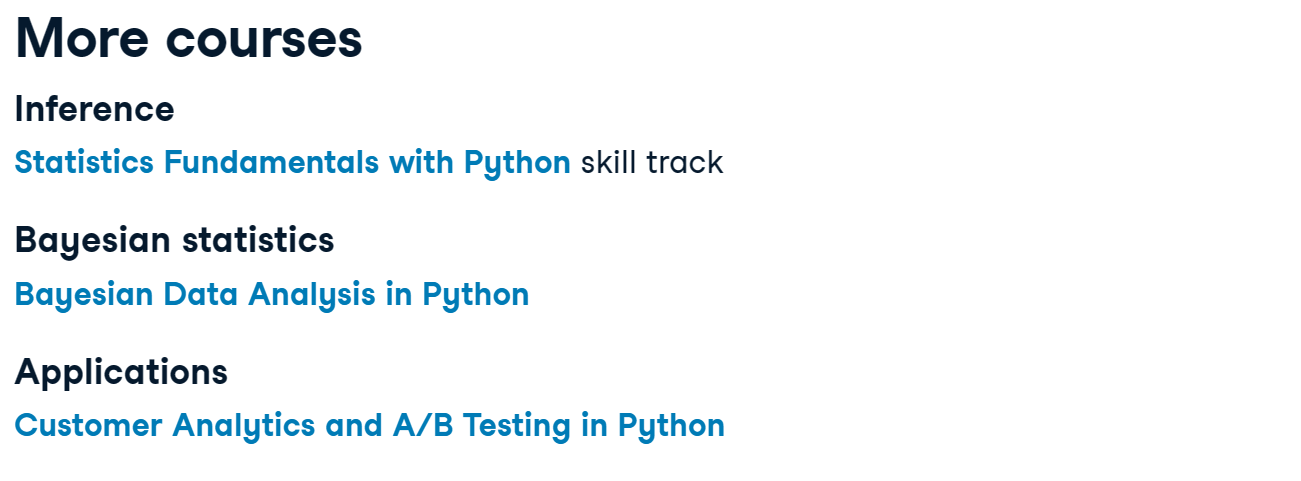